In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv("loan_train.csv")
predict=pd.read_csv("loan_test.csv")

In [ ]:
train_original=train.copy()
predict_original=predict.copy()

In [ ]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
predict.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


<Axes: title={'center': 'loan status'}, xlabel='Loan_Status'>

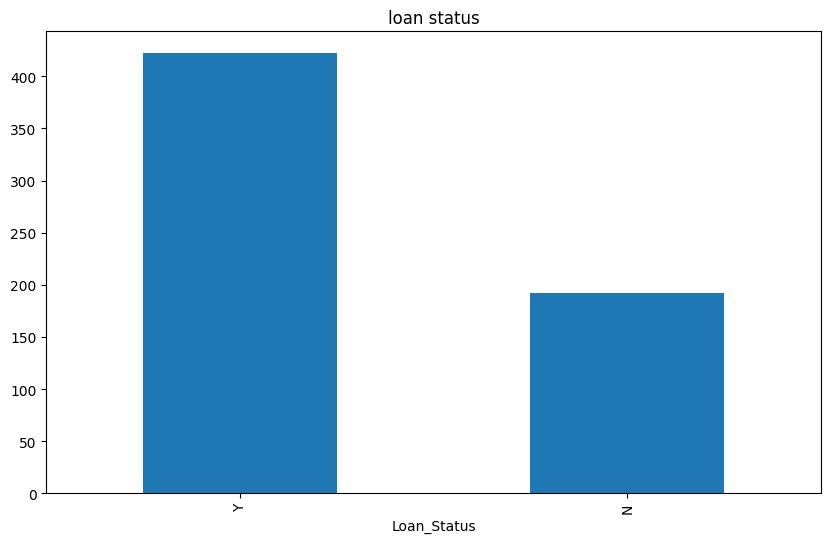

In [ ]:
train['Loan_Status'].value_counts().plot.bar(figsize=(10,6),title='loan status')

<Axes: title={'center': 'Credit History'}, xlabel='Credit_History'>

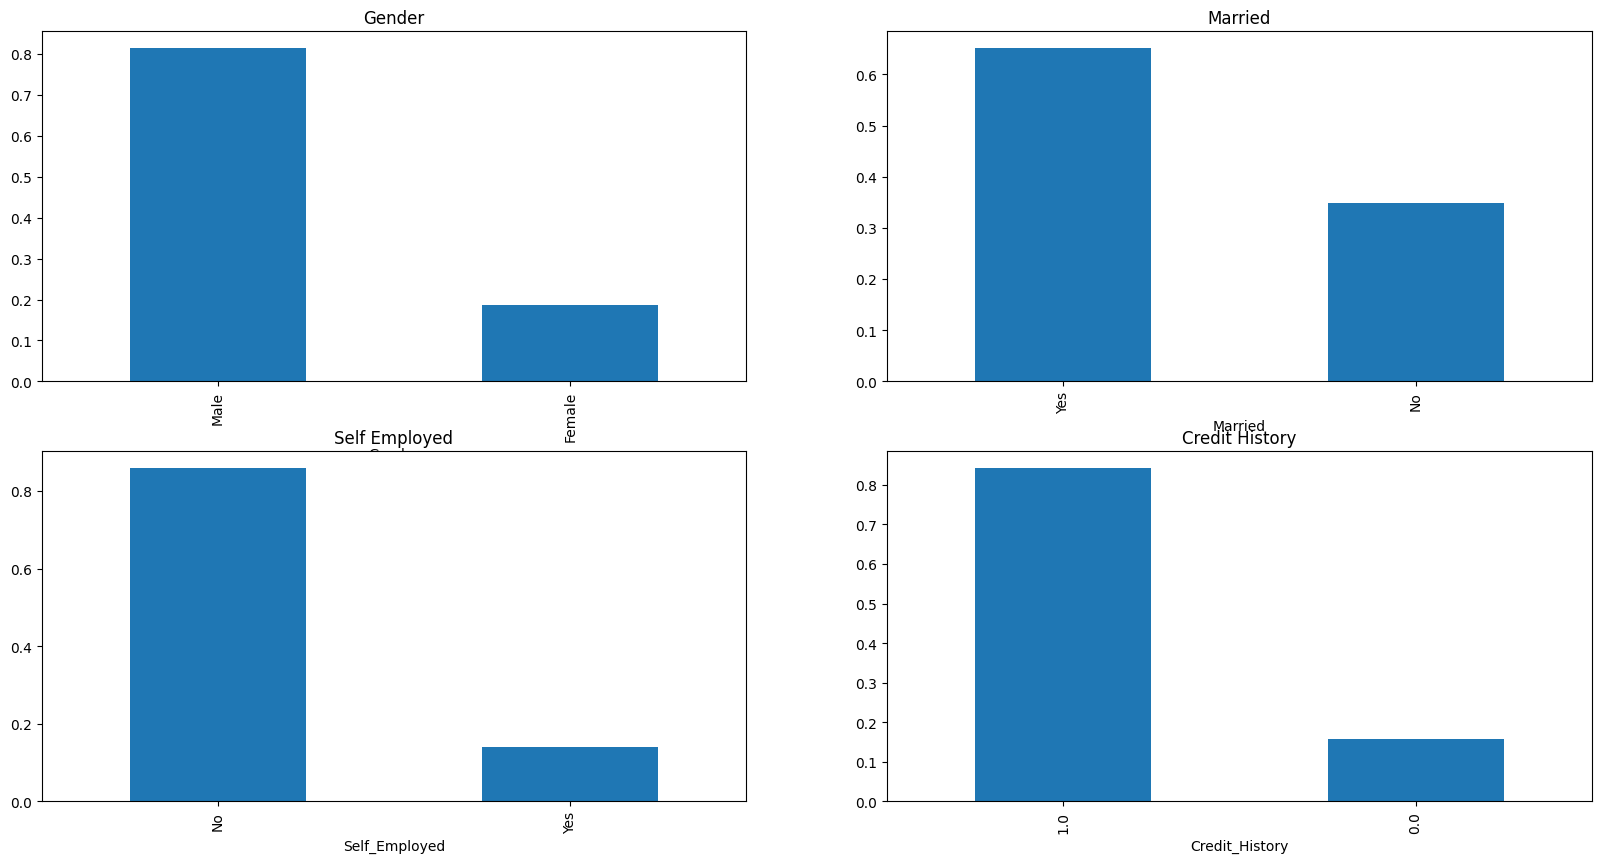

In [ ]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

<Axes: title={'center': 'Porperty area'}, xlabel='Property_Area'>

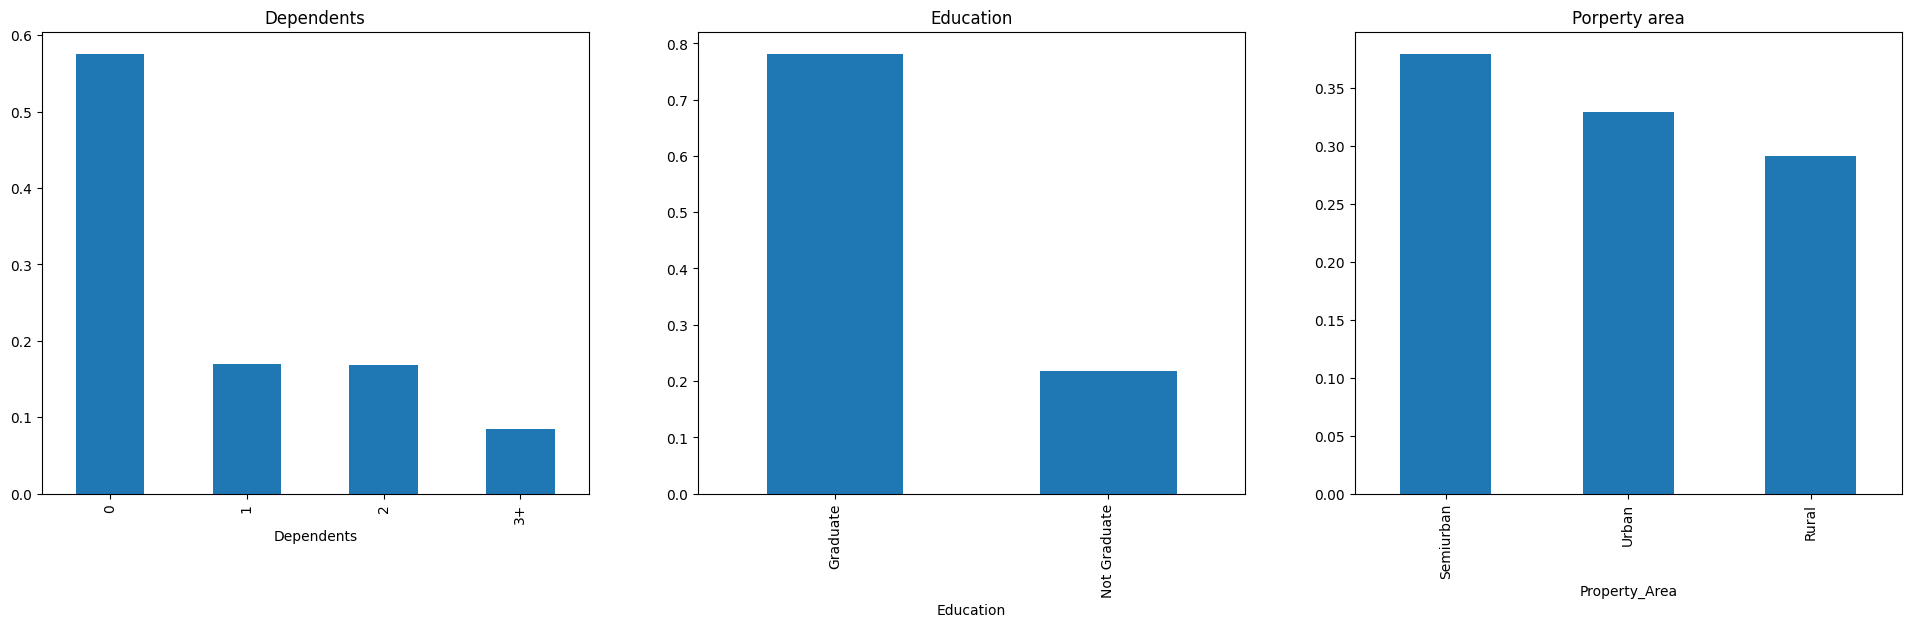

In [ ]:
plt.figure(2)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Porperty area')

/tmp/ipython-input-145813991.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])
/tmp/ipython-input-145813991.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CoapplicantIncome'])


<Axes: >

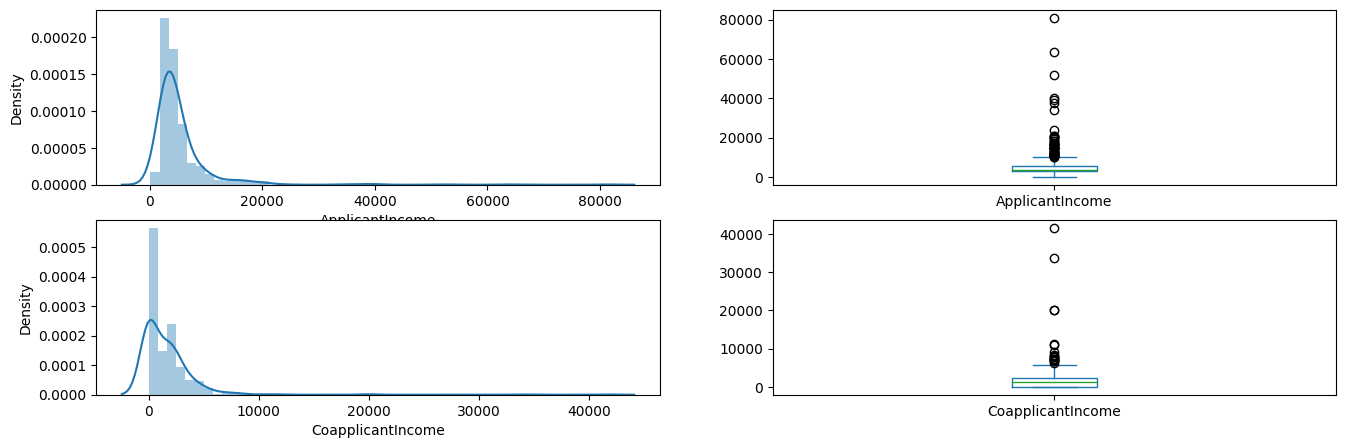

In [ ]:
plt.figure(3)
plt.subplot(221)
sns.distplot(train['ApplicantIncome'])
plt.subplot(222)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.subplot(223)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(224)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

/tmp/ipython-input-3157470459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])
/tmp/ipython-input-3157470459.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term'>

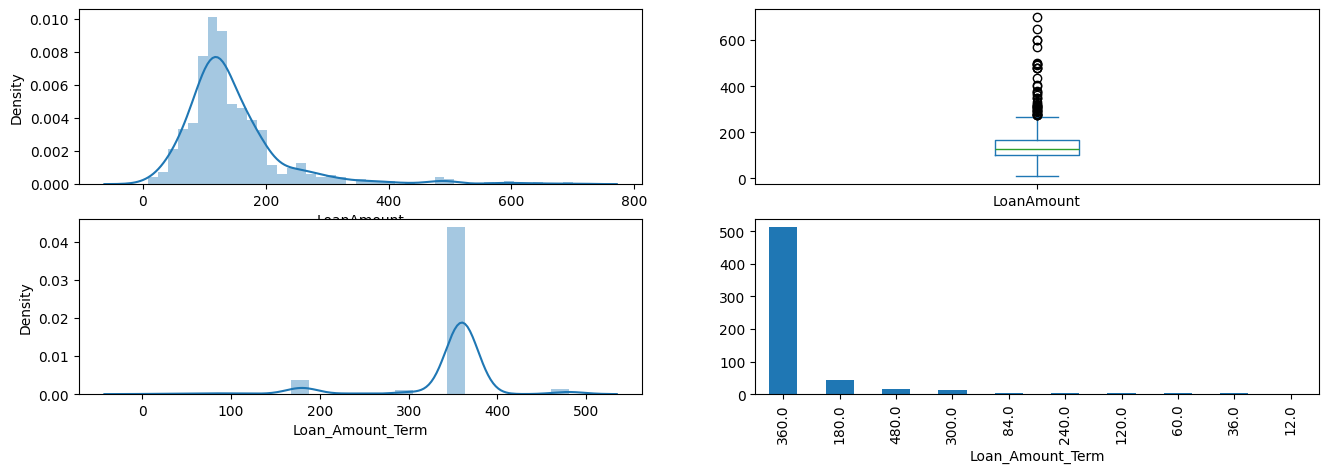

In [ ]:
plt.figure(4)
plt.subplot(221)
sns.distplot(train['LoanAmount'])
plt.subplot(222)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.subplot(223)
sns.distplot(train['Loan_Amount_Term'])
plt.subplot(224)
train['Loan_Amount_Term'].value_counts().plot.bar(figsize=(16,5))

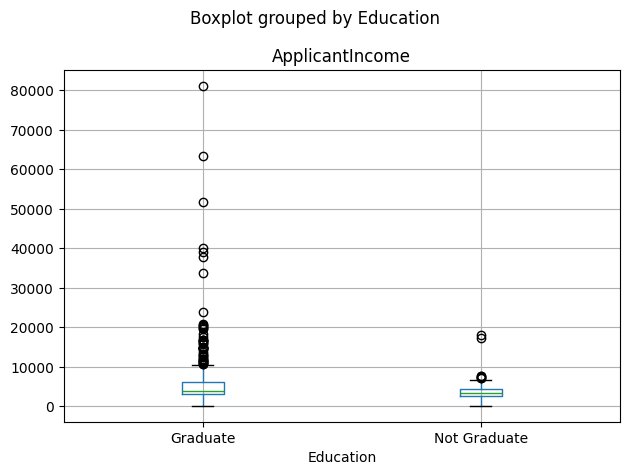

In [ ]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.tight_layout()

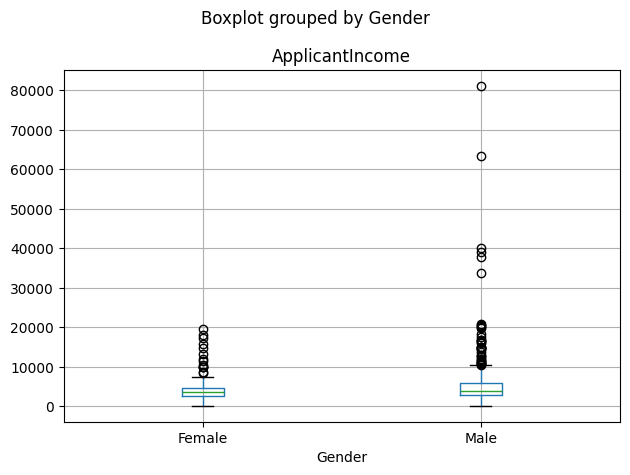

In [ ]:
train.boxplot(column='ApplicantIncome',by='Gender')
plt.tight_layout()

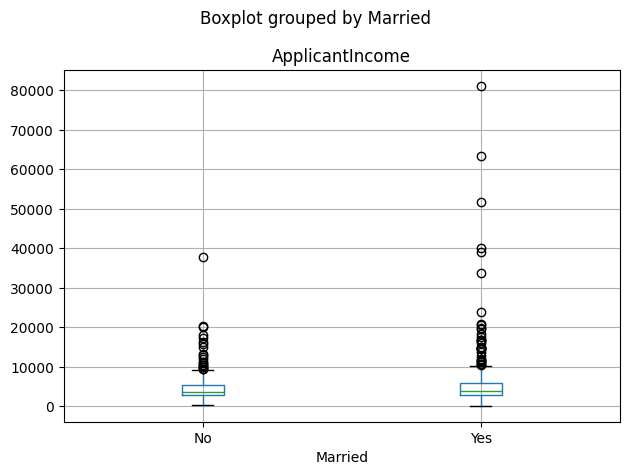

In [ ]:
train.boxplot(column='ApplicantIncome',by='Married')
plt.tight_layout()

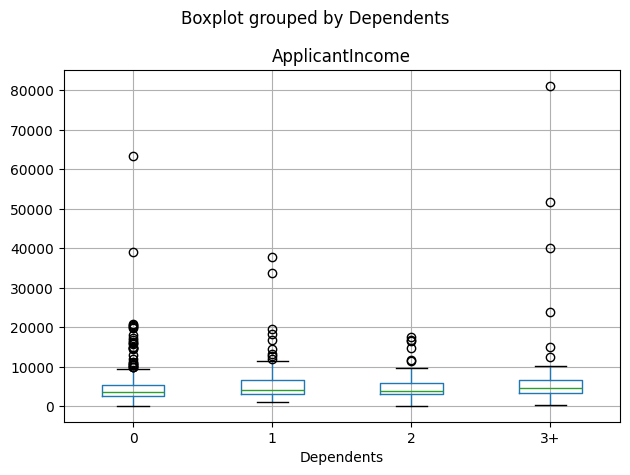

In [ ]:
train.boxplot(column='ApplicantIncome',by='Dependents')
plt.tight_layout()

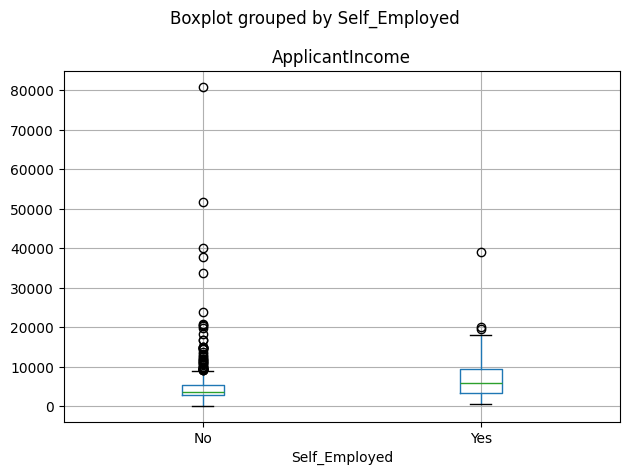

In [ ]:
train.boxplot(column='ApplicantIncome',by='Self_Employed')
plt.tight_layout()

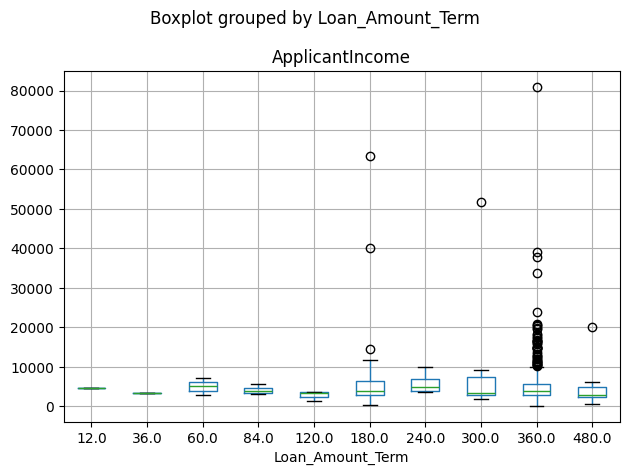

In [ ]:
train.boxplot(column='ApplicantIncome',by='Loan_Amount_Term')
plt.tight_layout()

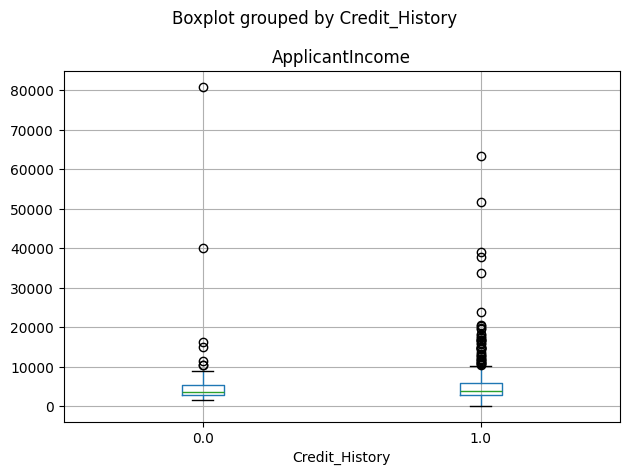

In [ ]:
train.boxplot(column='ApplicantIncome',by='Credit_History')
plt.tight_layout()

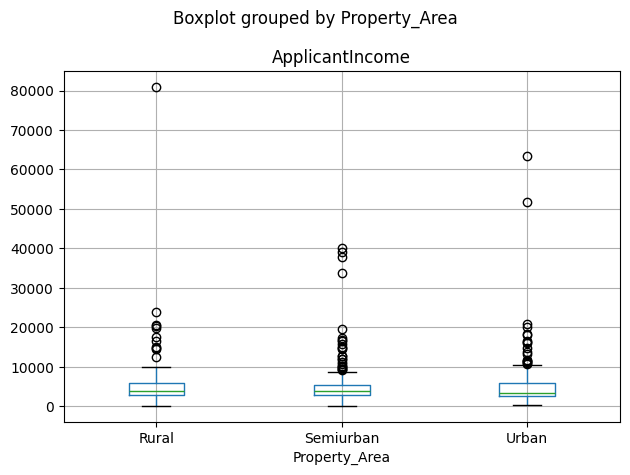

In [ ]:
train.boxplot(column='ApplicantIncome',by='Property_Area')
plt.tight_layout()

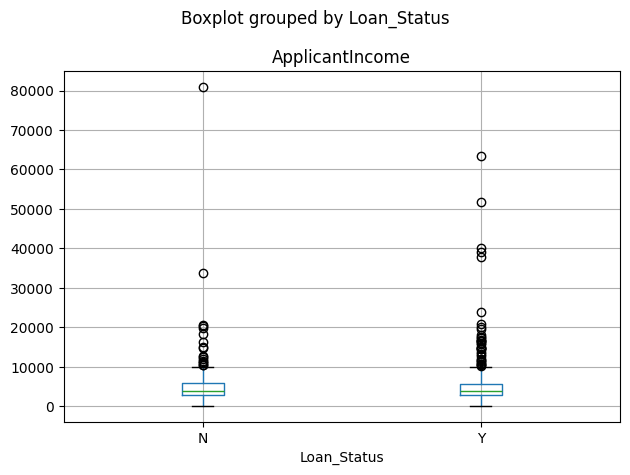

In [ ]:
train.boxplot(column='ApplicantIncome',by='Loan_Status')
plt.tight_layout()

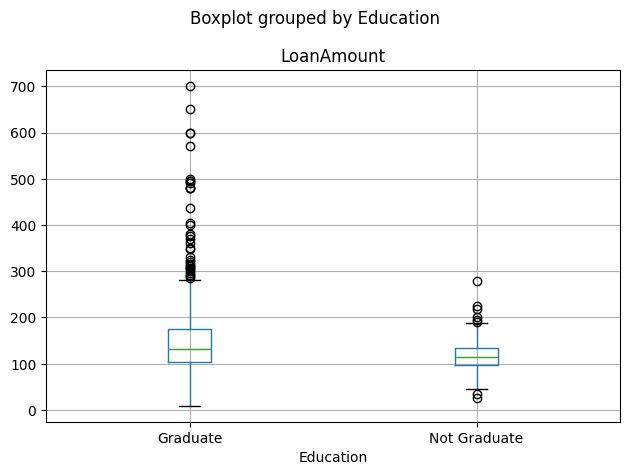

In [ ]:
train.boxplot(column='LoanAmount',by='Education')
plt.tight_layout()

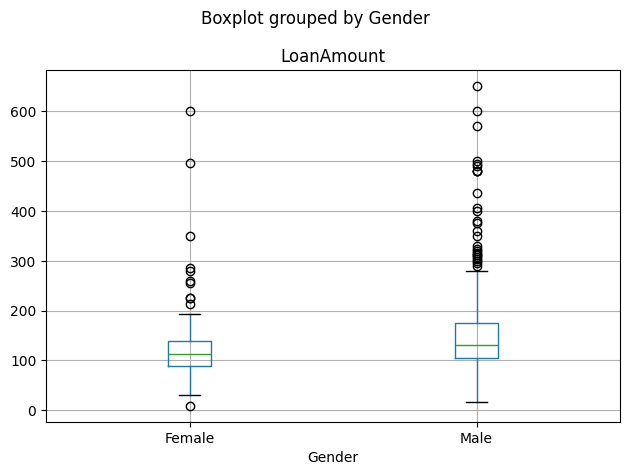

In [ ]:
train.boxplot(column='LoanAmount',by='Gender')
plt.tight_layout()

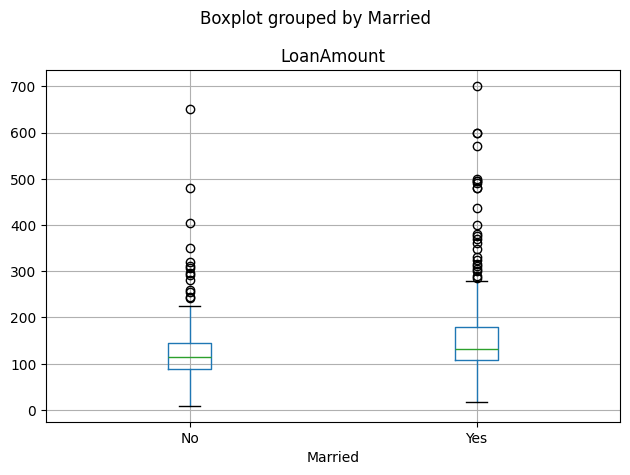

In [ ]:
train.boxplot(column='LoanAmount',by='Married')
plt.tight_layout()

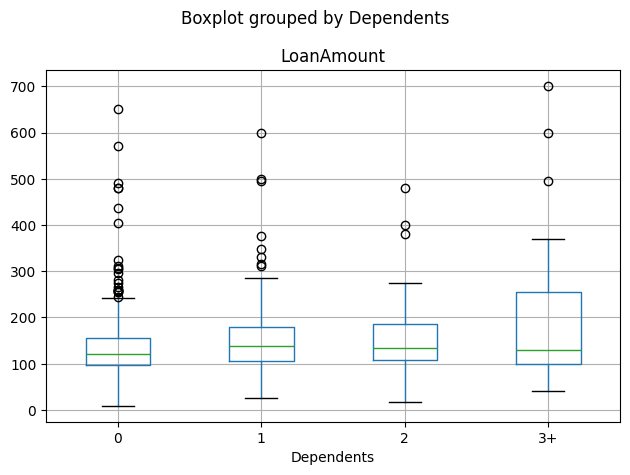

In [ ]:
train.boxplot(column='LoanAmount',by='Dependents')
plt.tight_layout()

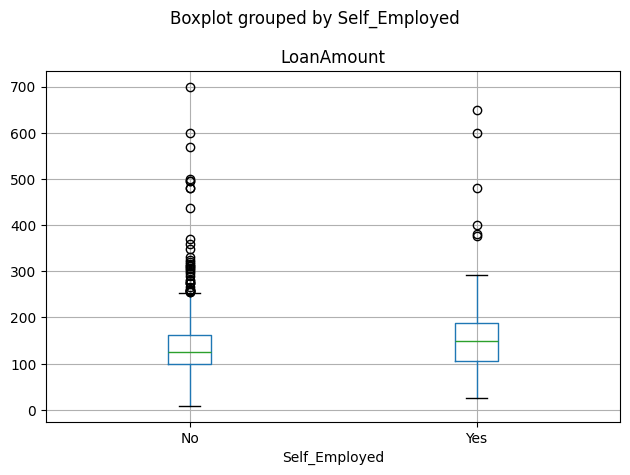

In [ ]:
train.boxplot(column='LoanAmount',by='Self_Employed')
plt.tight_layout()

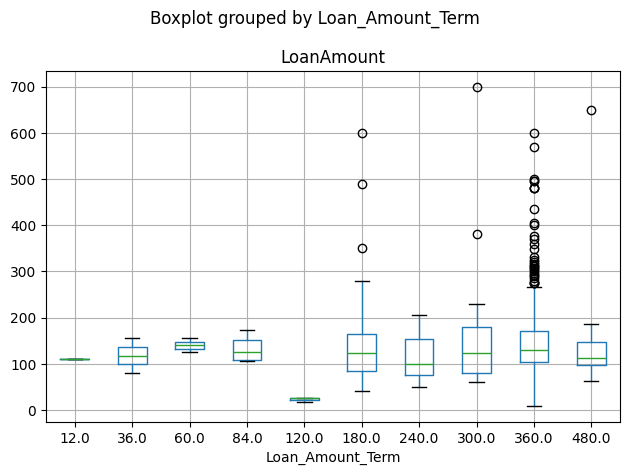

In [ ]:
train.boxplot(column='LoanAmount',by='Loan_Amount_Term')
plt.tight_layout()

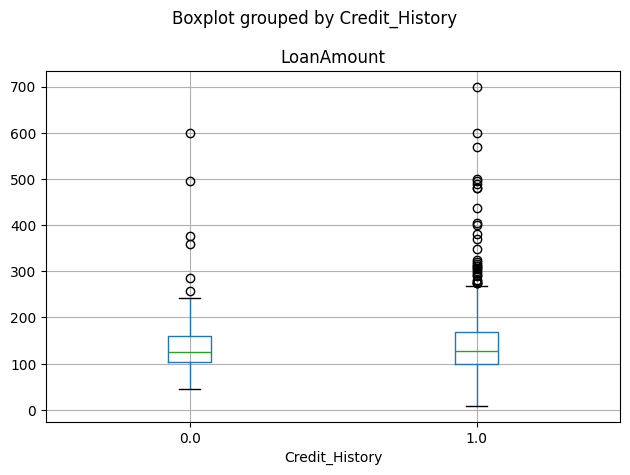

In [ ]:
train.boxplot(column='LoanAmount',by='Credit_History')
plt.tight_layout()

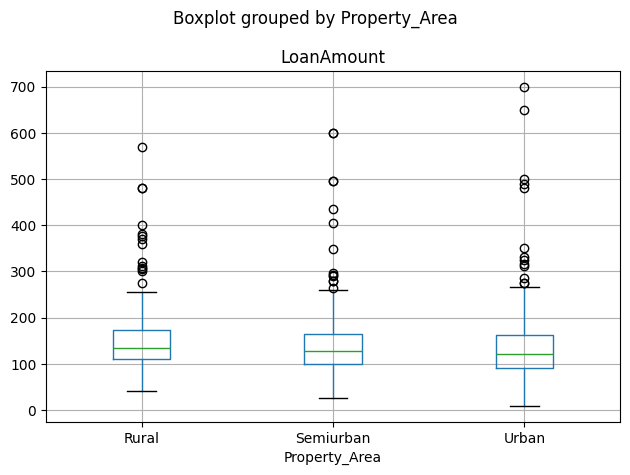

In [ ]:
train.boxplot(column='LoanAmount',by='Property_Area')
plt.tight_layout()

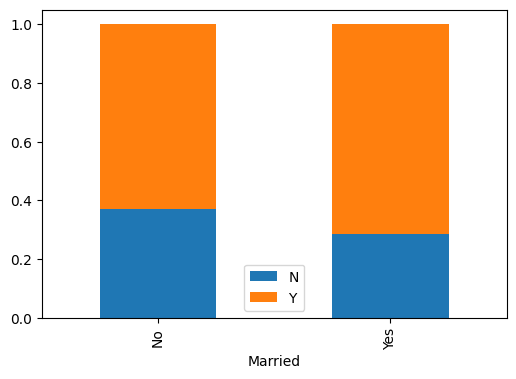

In [ ]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(6,4))
plt.legend(loc='best')

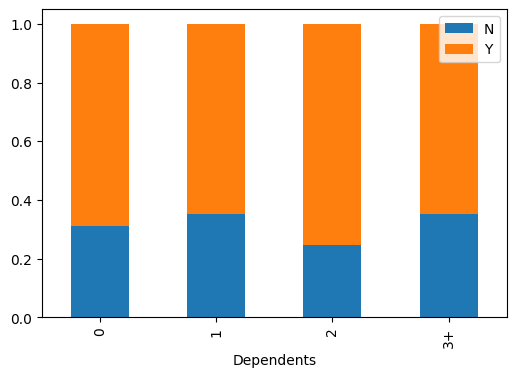

In [ ]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(6,4))
plt.legend(loc='best')

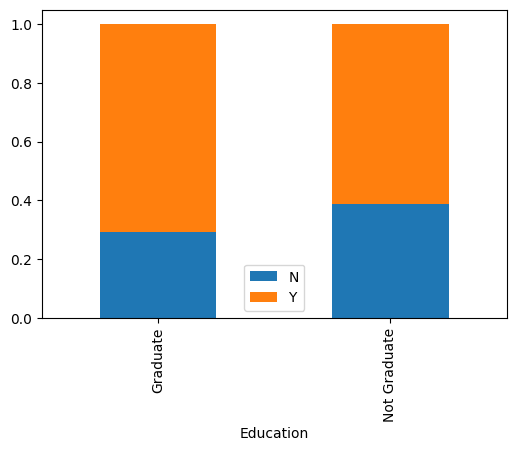

In [ ]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(6,4))
plt.legend(loc='best')

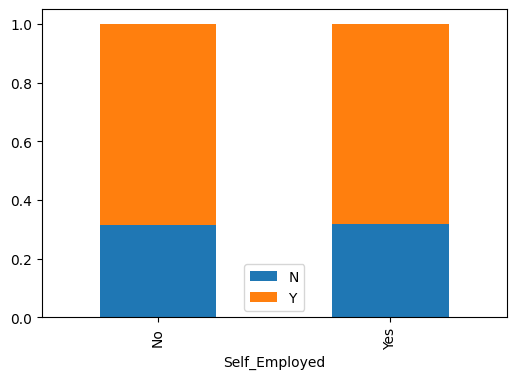

In [ ]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(6,4))
plt.legend(loc='best')

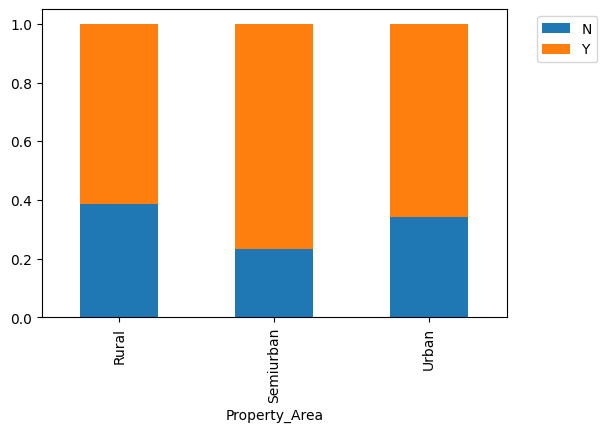

In [ ]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

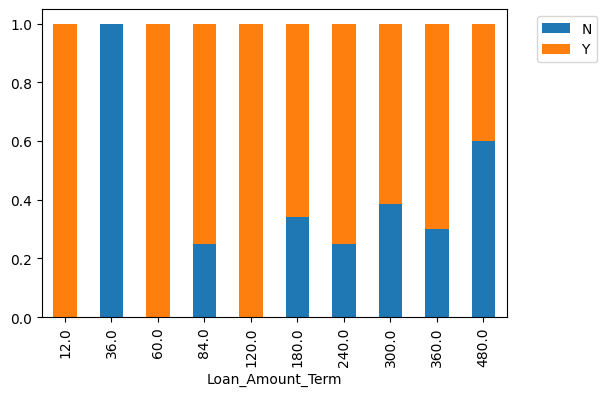

In [ ]:
Loan_Amount_Term=pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status'])
Loan_Amount_Term.div(Loan_Amount_Term.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

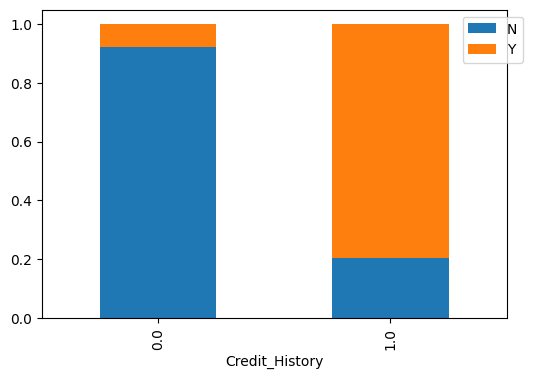

In [ ]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


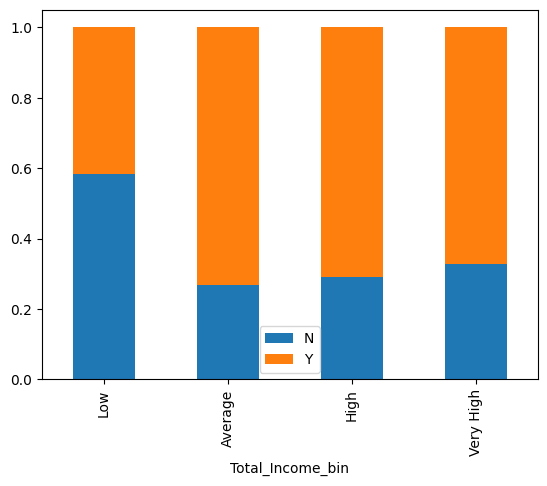

In [ ]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.legend(loc='best')

In [ ]:
train['Dependents'].replace('3+',3,inplace=True)
predict['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

/tmp/ipython-input-465905501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Dependents'].replace('3+',3,inplace=True)
/tmp/ipython-input-465905501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

<Axes: >

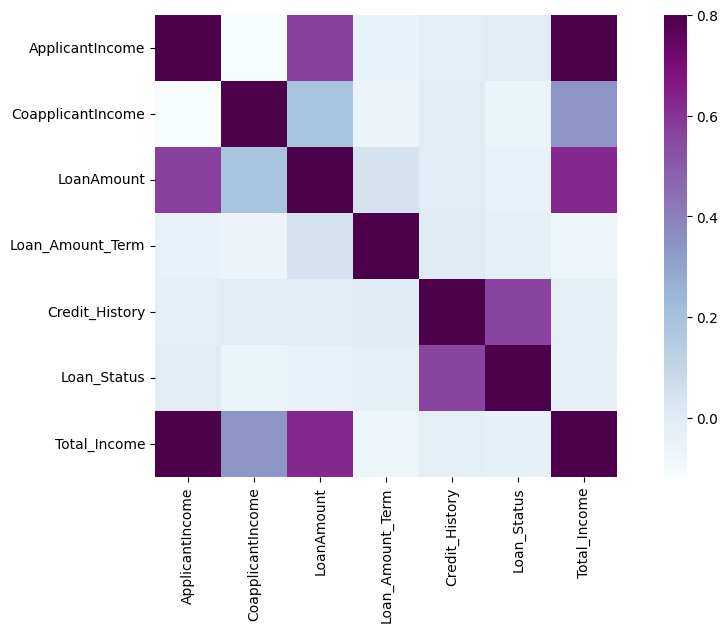

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(train.select_dtypes(include=['number']).corr(),vmax=0.8,cmap='BuPu',square=True)

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
cols_c1=['Gender','Married','Self_Employed','Dependents','Loan_Amount_Term','Credit_History']
for col in cols_c1:
  train[col].fillna(train[col].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

/tmp/ipython-input-1157355150.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0],inplace=True)
/tmp/ipython-input-1157355150.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

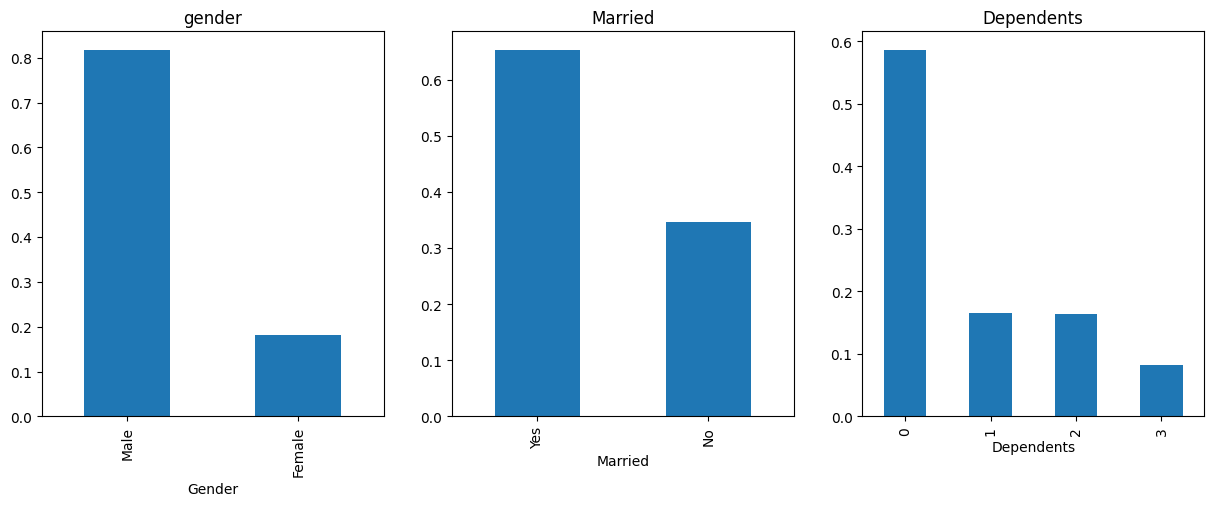

In [ ]:
plt.figure(5)
plt.subplot(131)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,5),title='gender')
plt.subplot(132)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(133)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

<Axes: title={'center': 'Credit History'}, xlabel='Credit_History'>

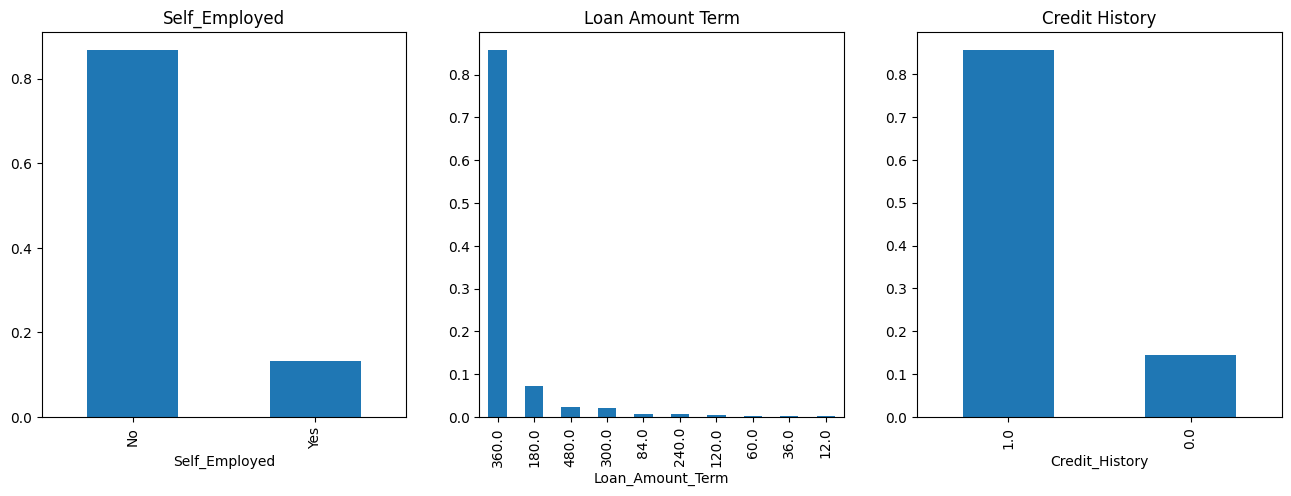

In [ ]:
plt.figure(6)
plt.subplot(131)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(16,5),title='Self_Employed')
plt.subplot(132)
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan Amount Term')
plt.subplot(133)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

/tmp/ipython-input-1197206266.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

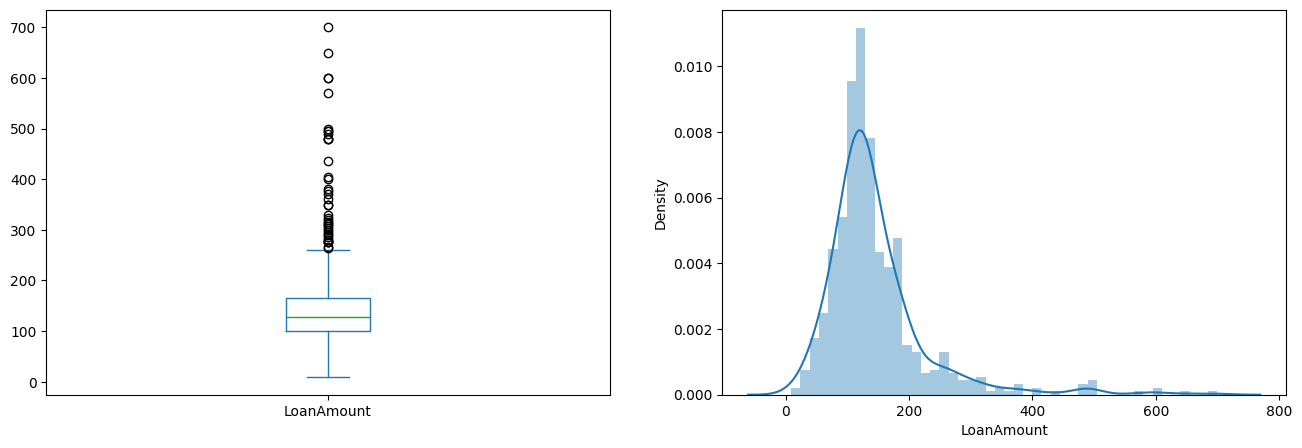

In [ ]:
plt.figure(7)
plt.subplot(121)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.subplot(122)
sns.distplot(train['LoanAmount'])

In [ ]:
predict.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
cols_c2=['Gender','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
for col in cols_c2:
  predict[col].fillna(predict[col].mode()[0],inplace=True)
predict['LoanAmount'].fillna(predict['LoanAmount'].median(),inplace=True)

/tmp/ipython-input-155824437.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predict[col].fillna(predict[col].mode()[0],inplace=True)
/tmp/ipython-input-155824437.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
predict.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y_original=train_original['Loan_Status']
X_original=train_original.drop(['Loan_Status','Loan_ID'],axis=1)
num_cols=X_original.select_dtypes(include=['int64','float64']).columns
cat_cols=X_original.select_dtypes(include='object').columns

X_original[num_cols]=scaler.fit_transform(X_original[num_cols])
knn_imp=KNNImputer(n_neighbors=5)
X_original[num_cols]=knn_imp.fit_transform(X_original[num_cols])

cat_imp=SimpleImputer(strategy='most_frequent')
X_original[cat_cols]=cat_imp.fit_transform(X_original[cat_cols])

In [ ]:
X_original.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
predict_original[num_cols]=knn_imp.transform(predict_original[num_cols])
predict_original[cat_cols]=cat_imp.transform(predict_original[cat_cols])

In [ ]:
predict_original.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
X=train.drop(['Loan_Status','Loan_ID'], axis=1)
Y=train['Loan_Status']
predict_ids=predict['Loan_ID']
predict=predict.drop('Loan_ID',axis=1)

In [ ]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
predict=pd.get_dummies(predict)
predict=predict.reindex(columns=X.columns,fill_value=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train,Y_train=sm.fit_resample(X_train,Y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,f1_score
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.72      0.65        58
           1       0.86      0.76      0.81       127

    accuracy                           0.75       185
   macro avg       0.72      0.74      0.73       185
weighted avg       0.77      0.75      0.76       185



In [ ]:
print(accuracy_score(Y_test,predictions))

0.7513513513513513


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier(n_estimators=500)
rfmodel.fit(X_train,Y_train)
rfpredictions=rfmodel.predict(X_test)

In [ ]:
print(classification_report(Y_test,rfpredictions))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65        58
           1       0.84      0.86      0.85       127

    accuracy                           0.79       185
   macro avg       0.76      0.75      0.75       185
weighted avg       0.79      0.79      0.79       185



In [ ]:
print(accuracy_score(Y_test,rfpredictions))

0.7891891891891892


In [ ]:
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression(max_iter=1000)
lrmodel.fit(X_train,Y_train)
lrpredictions=lrmodel.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(Y_test,lrpredictions))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        58
           1       0.84      0.92      0.88       127

    accuracy                           0.82       185
   macro avg       0.81      0.76      0.78       185
weighted avg       0.82      0.82      0.81       185



In [ ]:
print(accuracy_score(Y_test,lrpredictions))

0.8216216216216217


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
models={'KNN':KNeighborsClassifier(),
        'SVM':SVC(probability=True),
        'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
        'Gradient Boost':GradientBoostingClassifier()}
for name, model in models.items():
  model.fit(X_train,Y_train)
  preds=model.predict(X_test)
  acc=accuracy_score(Y_test,preds)
  print(f'{name} Accuracy:{acc:.4f}')
  print(classification_report(Y_test,preds))

KNN Accuracy:0.5189
              precision    recall  f1-score   support

           0       0.29      0.38      0.33        58
           1       0.67      0.58      0.62       127

    accuracy                           0.52       185
   macro avg       0.48      0.48      0.48       185
weighted avg       0.55      0.52      0.53       185

SVM Accuracy:0.4703
              precision    recall  f1-score   support

           0       0.32      0.62      0.42        58
           1       0.70      0.40      0.51       127

    accuracy                           0.47       185
   macro avg       0.51      0.51      0.47       185
weighted avg       0.58      0.47      0.48       185



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:57:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy:0.7784
              precision    recall  f1-score   support

           0       0.63      0.69      0.66        58
           1       0.85      0.82      0.84       127

    accuracy                           0.78       185
   macro avg       0.74      0.75      0.75       185
weighted avg       0.78      0.78      0.78       185

Gradient Boost Accuracy:0.7892
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        58
           1       0.83      0.87      0.85       127

    accuracy                           0.79       185
   macro avg       0.76      0.74      0.75       185
weighted avg       0.79      0.79      0.79       185



In [ ]:
from sklearn.neural_network import MLPClassifier
nnmodel=MLPClassifier(hidden_layer_sizes=(200,100, 50),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42)
nnmodel.fit(X_train,Y_train)
nnpredictions=nnmodel.predict(X_test)
print(classification_report(Y_test,nnpredictions))

              precision    recall  f1-score   support

           0       0.33      0.88      0.48        58
           1       0.77      0.18      0.29       127

    accuracy                           0.40       185
   macro avg       0.55      0.53      0.39       185
weighted avg       0.63      0.40      0.35       185



In [ ]:
print(accuracy_score(Y_test,nnpredictions))

0.4


In [ ]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=42)
rf_para_grid={'n_estimators':[200,500,800],
              'max_depth':[None,6,10],
              'min_samples_split':[2,5],
              'min_samples_leaf':[1,2]}
rf_grid=GridSearchCV(
    estimator=rf,
    param_grid=rf_para_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train,Y_train)
print('rf best params:',rf_grid.best_params_)
print('rf best f1 score:',rf_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
rf best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}
rf best f1 score: 0.8685348975291838


In [ ]:
best_rf=rf_grid.best_estimator_
rf_best_pred=best_rf.predict(X_test)
print('RF test accuracy:',accuracy_score(Y_test,rf_best_pred))
print('RF test F1:',f1_score(Y_test,rf_best_pred))
print(classification_report(Y_test,rf_best_pred))

RF test accuracy: 0.7945945945945946
RF test F1: 0.8549618320610687
              precision    recall  f1-score   support

           0       0.70      0.60      0.65        58
           1       0.83      0.88      0.85       127

    accuracy                           0.79       185
   macro avg       0.76      0.74      0.75       185
weighted avg       0.79      0.79      0.79       185



In [ ]:
rf_para_grid1={'n_estimators':[400,600,700],
              'max_depth':[None,8,12],
              'min_samples_split':[2,5],
              'min_samples_leaf':[1,2]}
rf_grid1=GridSearchCV(
    estimator=rf,
    param_grid=rf_para_grid1,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)
rf_grid1.fit(X_train,Y_train)
print('rf best params1:',rf_grid1.best_params_)
print('rf best f1 score1:',rf_grid1.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
rf best params1: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 700}
rf best f1 score1: 0.8685348975291838


In [ ]:
best_rf1=rf_grid1.best_estimator_
rf_best_pred1=best_rf1.predict(X_test)
print('RF test accuracy1:',accuracy_score(Y_test,rf_best_pred1))
print('RF test F1 1:',f1_score(Y_test,rf_best_pred1))
print(classification_report(Y_test,rf_best_pred1))

RF test accuracy1: 0.7945945945945946
RF test F1 1: 0.8549618320610687
              precision    recall  f1-score   support

           0       0.70      0.60      0.65        58
           1       0.83      0.88      0.85       127

    accuracy                           0.79       185
   macro avg       0.76      0.74      0.75       185
weighted avg       0.79      0.79      0.79       185



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
log_pipe=Pipeline([('scaler',StandardScaler()),('clf',LogisticRegression(max_iter=2000,random_state=42))])
log_para_grid={
    'clf__C':[0.01,0.1,1,5,10],
    'clf__penalty':['l2'],
    'clf__solver':['lbfgs']
}
log_grid=GridSearchCV(
    estimator=log_pipe,
    param_grid=log_para_grid,
    cv=5,
    scoring='f1'
)
log_grid.fit(X_train,Y_train)
print('log best params',log_grid.best_params_)
print('log best CV F1',log_grid.best_score_)

log best params {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
log best CV F1 0.8551056536693595


In [ ]:
best_log=log_grid.best_estimator_
log_pred=best_log.predict(X_test)
print('log test accuracy:',accuracy_score(Y_test,log_pred))
print('log test f1:',f1_score(Y_test,log_pred))
print(classification_report(Y_test,log_pred))

log test accuracy: 0.8324324324324325
log test f1: 0.8847583643122676
              precision    recall  f1-score   support

           0       0.81      0.60      0.69        58
           1       0.84      0.94      0.88       127

    accuracy                           0.83       185
   macro avg       0.83      0.77      0.79       185
weighted avg       0.83      0.83      0.82       185



In [ ]:
xgb=XGBClassifier(
    use_label_encoder=False,
    eval_metrics='logloss',
    random_state=42,
    tree_method='hist'
)
xgb_params_grid={
    'n_estimators':[300,500],
    'max_depth':[3,5,10],
    'learning_rate':[0.05,0.1],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0]
}
xgb_grid=GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
xgb_grid.fit(X_train,Y_train)
print('xgb best params:',xgb_grid.best_params_)
print('xgb best CV f1:',xgb_grid.best_score_)

xgb best params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
xgb best CV f1: 0.8379625386556446


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:54:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
best_xgb=xgb_grid.best_estimator_
xgb_best_pred=best_xgb.predict(X_test)
print('xgb test accuracy:',accuracy_score(Y_test,xgb_best_pred))
print('xgb test f1:',f1_score(Y_test, xgb_best_pred))
print(classification_report(Y_test, xgb_best_pred))

xgb test accuracy: 0.7945945945945946
xgb test f1: 0.8492063492063492
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        58
           1       0.86      0.84      0.85       127

    accuracy                           0.79       185
   macro avg       0.76      0.77      0.76       185
weighted avg       0.80      0.79      0.80       185



In [ ]:
gb=GradientBoostingClassifier(random_state=42)
gb_para_grid={
'n_estimators':[100,200,300],
'max_depth':[2,3,4],
'learning_rate':[0.05,0.1,0.2],
'subsample':[0.8,1.0]
}
gb_grid=GridSearchCV(
    estimator=gb,
    param_grid=gb_para_grid,
    cv=5,
    scoring='f1'
)
gb_grid.fit(X_train,Y_train)
print('gb best params:',gb_grid.best_params_)
print('gb best cv f1:',gb_grid.best_score_)

gb best params: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
gb best cv f1: 0.8511401329851449


In [ ]:
best_gb=gb_grid.best_estimator_
gb_pred=best_gb.predict(X_test)
print('gb test accuracy:',accuracy_score(Y_test,gb_pred))
print('gb test f1 score:',f1_score(Y_test,gb_pred))
print(classification_report(Y_test,gb_pred))

gb test accuracy: 0.7891891891891892
gb test f1 score: 0.8482490272373541
              precision    recall  f1-score   support

           0       0.67      0.64      0.65        58
           1       0.84      0.86      0.85       127

    accuracy                           0.79       185
   macro avg       0.76      0.75      0.75       185
weighted avg       0.79      0.79      0.79       185



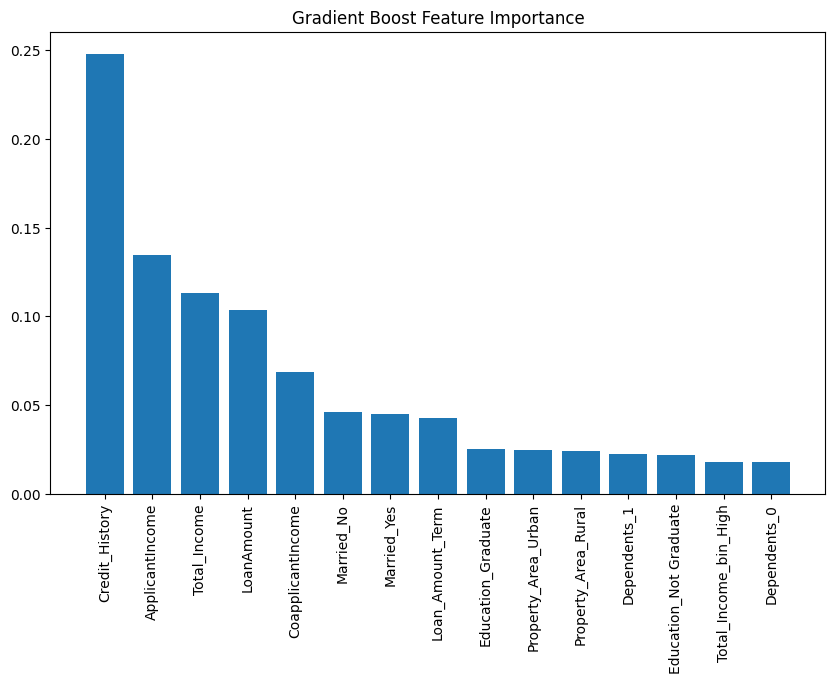

In [ ]:
importance=best_gb.feature_importances_
indices=np.argsort(importance)[::-1]

top_n=15
top_indices=indices[:top_n]
plt.figure(figsize=(10,6))
plt.title('Gradient Boost Feature Importance')
plt.bar(range(top_n),importance[top_indices])
plt.xticks(range(top_n),X_train.columns[top_indices],rotation=90)
plt.show()

In [ ]:
final_pred=best_gb.predict(predict)
output=pd.DataFrame({
    'Loan_ID':predict_ids,
    'Loan_Status':final_pred}
)
output

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,0
